In [ ]:
# Parker Mullins
# ArtificalIntelligencePrompt.ipynb

# Question 1:
# The data appears to be separated into 5 columns consisting of year, major, university, time, and order.
# There appears to be no missing data, and there are 5000 entries in each column.
# One immediate bias I caught was that there appears to be no entries for students above their third year attending a university.
# Besides guessing orders, this dataset could be used to see how many students of each major, grade, and university visit the food truck.
# Also, you could see what times tend to be the busiest among students.
# You could try to market your business to majors that tend to not visit the food truck as often to get more students visiting.

# Question 2:
# People own their own data, so they should be 100% consenting to having their data used by the food truck to guess orders.
# Also, the food truck should be completely transparent in the data collection and say what it is used for.
# Make sure there are no biases in the data collection, such as leaving out year 4 students as mentioned above.
# Considering business outcomes, the food truck will save money if the data is used properly in guessing orders.
# The reputation and financial stability of the business are also at stake if the data is used in a damaging or biased way.
# This can even lead to trouble with customers or legal trouble in the worst cases of data abuse.
# Speaking technically, the data should be stored safely so that it cannot be stolen or used harmfully.
# Also, the data should be stored in a clean fashion because poor data can cause issues when trying to get results.

In [17]:
import warnings
warnings.simplefilter(action='ignore')

# Import the standard Python libraries
import numpy as np
import pandas as pd

# Import preprocessing and model selection libraries from scikit-learn
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression

# Import the machine learning models ffrom scikit-learn
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [28]:
# Load the iris dataset into a dataframe
FoodX_df = pd.read_csv('FoodX.csv')
FoodX_df['Year'].unique()
FoodX_df['University'].unique()
FoodX_df['Major'].unique()

print(FoodX_df.shape)
print(FoodX_df)

(5000, 5)
        Year                    Major                University  Time  \
0     Year 2                  Physics  Indiana State University    12   
1     Year 3                Chemistry     Ball State University    14   
2     Year 3                Chemistry         Butler University    12   
3     Year 2                  Biology  Indiana State University    11   
4     Year 3  Business Administration         Butler University    12   
...      ...                      ...                       ...   ...   
4995  Year 2              Mathematics     Ball State University    11   
4996  Year 3                Astronomy  Indiana State University    12   
4997  Year 3                Chemistry         Butler University    13   
4998  Year 3                Astronomy         Butler University    15   
4999  Year 2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  Fried Catfish Basket

In [35]:
# Convert categorical values into unique ints
label_encoder = LabelEncoder()
FoodX_df['Year'] = label_encoder.fit_transform(FoodX_df['Year'])
FoodX_df['University'] = label_encoder.fit_transform(FoodX_df['University'])
FoodX_df['Major'] = label_encoder.fit_transform(FoodX_df['Major'])
FoodX_df['Order'] = label_encoder.fit_transform(FoodX_df['Order'])

# Create X and y
X = FoodX_df.iloc[:, 0:4]
y = FoodX_df['Order']

# Test to see if worked
print(X.shape)
print(y.shape)
print(FoodX_df.shape)
print(FoodX_df)

(5000, 4)
(5000,)
(5000, 5)
      Year  Major  University  Time  Order
0        1     16           3    12      2
1        2      5           0    14      7
2        2      5           1    12      6
3        1      3           3    11      2
4        2      4           1    12      5
...    ...    ...         ...   ...    ...
4995     1     12           0    11      0
4996     2      2           3    12      9
4997     2      5           1    13      7
4998     2      2           1    15      7
4999     1      7           8    15      0

[5000 rows x 5 columns]


In [36]:
# Get the "original" list of features
features = list(X.columns)

# Use the SelectKBest method to reduce the number of features used in training the models
fs = SelectKBest(score_func=f_regression, k=4)

# Fit the selector on the dataset
fs.fit(X, y)

# Get the names of the selected features
selected = fs.get_feature_names_out()
print(selected)

# Creat "feature-selected" X_fs from the original X
X_fs = pd.DataFrame(fs.transform(X), columns=selected)
print(X_fs.shape)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

['Year' 'Major' 'University' 'Time']
(5000, 4)


In [38]:
# Choosing the best model for our dataset
estimators = {'ElasticNet': ElasticNet(), 'SVR': SVR(gamma='scale'), 'Lasso': Lasso(), 'Ridge': Ridge(),
              'RFR': RandomForestRegressor(n_estimators=80), 'HGBR': HistGradientBoostingRegressor()}

# Evaluating the models
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    
    # Make pipeline with scaler, feature selector, and model
    pipe = make_pipeline(StandardScaler(), SelectKBest(score_func=f_regression, k=4), estimator_object)
    
    scores = cross_val_score(estimator=pipe, X=X, y=y, cv=kfold)
    
    print(f'{estimator_name:>20}: ' + f'mean R_2_score= {scores.mean():.4f}; ' + f'standard deviation= {scores.std():.4f}')

          ElasticNet: mean R_2_score= 0.0761; standard deviation= 0.0088
                 SVR: mean R_2_score= 0.1893; standard deviation= 0.0461
               Lasso: mean R_2_score= 0.0119; standard deviation= 0.0033
               Ridge: mean R_2_score= 0.1641; standard deviation= 0.0321
                 RFR: mean R_2_score= 0.3928; standard deviation= 0.0256
                HGBR: mean R_2_score= 0.3981; standard deviation= 0.0180


In [39]:
# Sample 10 out-of-sample data instances
sample_df = FoodX_df.sample(n=10)
print(sample_df.shape)
print(sample_df.iloc[:, 0:4])

(10, 5)
      Year  Major  University  Time
1849     1      1           3     9
2285     1      4           1    12
1530     2      7           5    13
270      2      1           3    14
3053     1      5           3    14
2935     2     16           3    12
2579     1      4           8    13
3323     2     11           0    10
3215     2      5           1    12
4435     2      7           1    13


In [40]:
# Remove the sample from the original dataframe
FoodX_df = FoodX_df.drop(sample_df.index).reset_index(drop=True)
print(FoodX_df.shape)

(4990, 5)


In [41]:
# Train the best model on the dataframe with the sample removed
X_new = FoodX_df.iloc[:, 0:4].to_numpy()
y_new = FoodX_df['Order']

# Create the optimal pipeline
pipe = make_pipeline(StandardScaler(), SelectKBest(score_func=f_regression, k=4), RandomForestRegressor(n_estimators=80))
pipe.fit(X=X_new, y=y_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x00000165557218A0>)),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=80))])

In [42]:
# Make predicitions on "new" data
print(sample_df.shape)
predicted = pipe.predict(sample_df.iloc[:, 0:4])
expected = FoodX_df['Order']

(10, 5)


In [50]:
print(sample_df)

      Year  Major  University  Time  Order
1849     1      1           3     9      2
2285     1      4           1    12      0
1530     2      7           5    13      3
270      2      1           3    14      3
3053     1      5           3    14      4
2935     2     16           3    12      2
2579     1      4           8    13      9
3323     2     11           0    10      5
3215     2      5           1    12      7
4435     2      7           1    13      7


In [46]:
# Save the model
import joblib
joblib.dump(pipe, 'model.joblib')

['model.joblib']

In [55]:
# Guess the order closest to the predicted order value
run UserInput.py

Enter the student year:  2
Enter the university attended:  11
Enter the student's major:  0
Enter the time:  13



The predicted order is: 7.196462912087911


<Axes: >

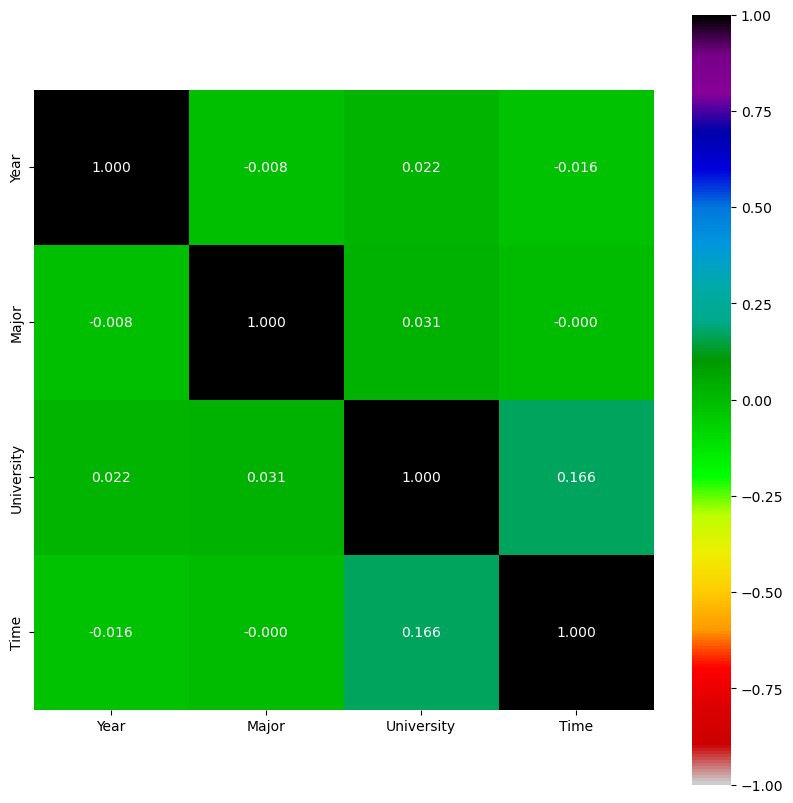

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X_fs.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True, fmt='.3f', cmap='nipy_spectral_r')

In [58]:
# Question 3:
# To see if this model is a suitable course of action, we would need to look at how well it performed.
# Using the RandomForestRegressor, I got my best R2 score of .3928, which means 39.28% of variation is accounted for in the model.
# Also, the model had a standard deviation of 0.0256, meaning the predicted order does not vary much.
# This is great, because it means the risk is fairly low, and the values do not vary much.
# Overall, I believe the model performs well enough to be used by the food truck.
# According to the model, the correct order should be given around one third of the time.
# However, one bad thing is that none of the four predictors seem to be closely related as shown in the heatmap above.